<a href="https://colab.research.google.com/github/anuradha-datascience/machine-learning/blob/main/InfoRetrievalAssignment2_CreditCard_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Details

**Assignment** : Evaluation of Classification Algorithms on Imbalanced Data

**A**

Search for a dataset containing imbalanced classes for classification analysis. -2 marks

****

- a Implement Python functions to handle class imbalance and train classifiers such as Naive Bayes and KNN on the imbalanced dataset. Evaluate the classifiers using performance metrics adjusted for imbalanced data, such as F1-score, precision-recall curves, and ROC-AUC. -4 marks

- b Discuss the challenges of dealing with imbalanced data in classification tasks and compare the performance of Naive Bayes and KNN classifiers in handling imbalanced datasets. -4 marks

# Task A
- Search for a dataset containing imbalanced classes for classification analysis


# About Dataset
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

##
Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.##

Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 othifition.



# Import Libraries


In [1]:
import warnings
warnings.filterwarnings('ignore')
# Data Manipulation , explore
import pandas as pd
import numpy as np

#visualize
import matplotlib.pyplot as plt
import seaborn as sns

#Modelling
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Data Balancing
from imblearn.over_sampling import SMOTE

# Performance Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_auc_score


# Load Data

In [2]:
df=pd.read_csv('creditcard.csv')
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8295,11080,1.372983,-0.382354,0.064602,-0.677002,-0.398106,0.039571,-0.896465,-0.051860,0.388561,...,0.114647,0.482646,-0.290577,-0.918547,0.596859,-0.073305,0.003622,0.020262,39.00,0.0
11861,20389,1.048919,-0.047160,0.505764,0.857389,-0.405459,-0.470953,-0.066600,-0.107679,1.483286,...,-0.339526,-0.953202,0.113428,-0.017943,0.051567,0.079935,-0.063200,0.022186,89.99,0.0
10493,17213,1.106035,0.587239,0.305717,2.475219,0.469112,0.316009,0.118873,0.028228,0.186603,...,-0.131572,-0.232906,-0.080202,-0.384346,0.504135,-0.000512,-0.049493,-0.004291,27.84,0.0
10714,18135,-0.000480,0.990282,1.279442,1.116650,0.217364,-0.235042,0.175045,-0.021591,0.419659,...,-0.301278,-0.640107,0.036930,-0.089333,-0.645966,0.235981,0.049853,0.066462,0.99,0.0
19815,30572,-0.854468,0.535924,1.981587,1.287696,0.326596,-0.593150,0.193623,0.167511,-0.571410,...,0.192270,0.397359,-0.215004,0.372348,0.295123,-0.084340,0.074722,0.083962,1.00,0.0


# Validate Data

In [3]:
df.shape

(19898, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19898 entries, 0 to 19897
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    19898 non-null  int64  
 1   V1      19898 non-null  float64
 2   V2      19898 non-null  float64
 3   V3      19898 non-null  float64
 4   V4      19898 non-null  float64
 5   V5      19898 non-null  float64
 6   V6      19898 non-null  float64
 7   V7      19898 non-null  float64
 8   V8      19898 non-null  float64
 9   V9      19898 non-null  float64
 10  V10     19898 non-null  float64
 11  V11     19897 non-null  float64
 12  V12     19897 non-null  float64
 13  V13     19897 non-null  float64
 14  V14     19897 non-null  float64
 15  V15     19897 non-null  float64
 16  V16     19897 non-null  float64
 17  V17     19897 non-null  float64
 18  V18     19897 non-null  float64
 19  V19     19897 non-null  float64
 20  V20     19897 non-null  float64
 21  V21     19897 non-null  float64
 22

In [5]:
#check for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [6]:
df=df.dropna(axis=0)

284807 -Rows, 31 - Columns

No Null Data

All the columns are numrical in nature - hence no categorical encoding is required

## Target Variable Distribution

### Feature and Target




In [7]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [8]:
# Figure out class distribution percentage
print("Percentage of Negative Class: ")
print(round(df['Class'].value_counts()[0]*100/len(df),3))

print("Percentage of Positive Class: ")
print(round(df['Class'].value_counts()[1]*100/len(df),3))

Percentage of Negative Class: 
99.573
Percentage of Positive Class: 
0.427


In [9]:
# Define the labels
labels = ['Non-Fraud', 'Fraud']

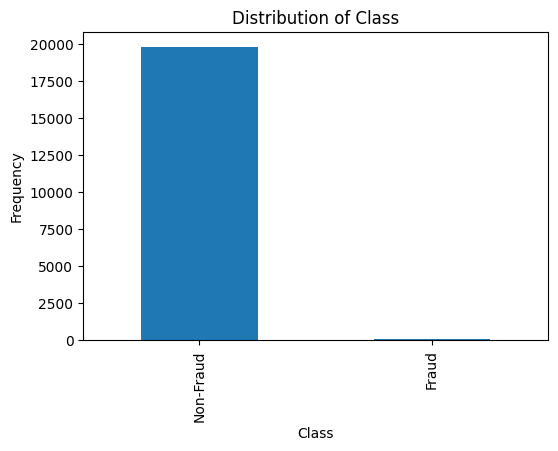

In [10]:
# Visualize the distribution
plt.figure(figsize=(6,4))

df['Class'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0,1],labels)
plt.title('Distribution of Class')
plt.show()

**This is highly imbalanced data with majority class 99.827**

# Task B
**a**
- Implement Python functions to handle class imbalance and
- train classifiers such as Naive Bayes and KNN on the imbalanced dataset.
- Evaluate the classifiers using performance metrics adjusted for imbalanced data, such as F1-score, precision-recall curves, and ROC-AUC.


## Handle Class Imbalance

**Resampling Methods**:

- Under-sampling: This involves removing samples from the majority class to balance the dataset. The primary disadvantage of under-sampling is that it may lead to loss of valuable information from the majority class, potentially resulting in an underfit model.

- Over-sampling: This technique involves duplicating samples from the minority class or generating synthetic samples to balance the dataset. One disadvantage of over-sampling by duplicating samples is that it can lead to overfitting, where the model may become overly biased towards the minority class.

- SMOTE (Synthetic Minority Over-sampling Technique):

SMOTE is a popular over-sampling technique that works by generating synthetic samples rather than simply duplicating existing ones. It selects samples from the minority class and creates synthetic examples by interpolating between them. This helps to mitigate the risk of overfitting that can occur with simple duplication. By creating synthetic samples, SMOTE increases the diversity of the minority class, making the model less likely to be biased towards specific patterns present in the origina class imbalance.

In this assignment we will be using SMOTE for handling data imbalancing




### Train Test Split



We need to perform train test split before applying SMOTE so that we apply on train data to smoothen training process but we will not apply SMOTE on test data which represents real world unseen data

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((15917, 30), (3980, 30), (15917,), (3980,))

In [21]:
# Figure out class distribution percentage
print("Percentage of Negative Class: ")
print(round(y_train.value_counts()[0]*100/len(df),3))

print("Percentage of Positive Class: ")
print(round(y_train.value_counts()[1]*100/len(df),3))

Percentage of Negative Class: 
79.655
Percentage of Positive Class: 
0.342


## SMOTE

In [13]:
# pip install -U threadpoolctl


In [19]:
method=SMOTE(random_state = 42)

# Create the resampled data from training data after applying smote
X_resampled, y_resampled = method.fit_resample(X_train,y_train)

In [22]:
# Figure out class distribution percentage after SMOTE
print("Percentage of Negative Class: ")
print(round(y_resampled.value_counts()[0]*100/len(df),3))

print("Percentage of Positive Class: ")
print(round(y_resampled.value_counts()[1]*100/len(df),3))

Percentage of Negative Class: 
79.655
Percentage of Positive Class: 
79.655


### Compare SMOTE to original Data


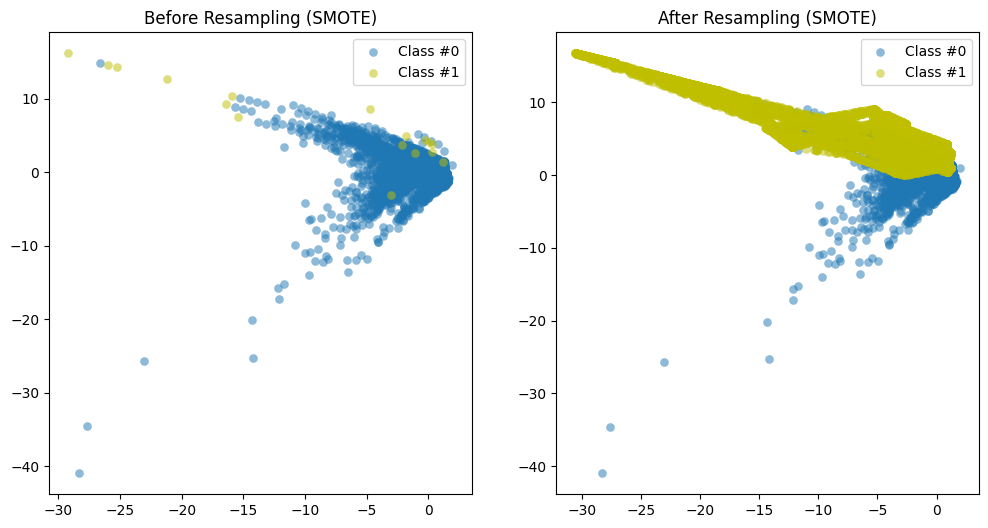

In [15]:
# Compare before and after SMOTE application on sample feature
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Before resampling
axes[0].scatter(X_train[y == 0].iloc[:, 1], X_train[y == 0].iloc[:, 2], label="Class #0", alpha=0.5, linewidth=0.15)
axes[0].scatter(X_test[y == 1].iloc[:, 1], X_test[y == 1].iloc[:, 2], label="Class #1", alpha=0.5, linewidth=0.15,c='y')
axes[0].set_title("Before Resampling (" + "SMOTE" + ")")
axes[0].legend()

# After resampling
axes[1].scatter(X_resampled[y_resampled == 0].iloc[:, 1], X_resampled[y_resampled == 0].iloc[:, 2], label="Class #0", alpha=0.5, linewidth=0.15)
axes[1].scatter(X_resampled[y_resampled == 1].iloc[:, 1], X_resampled[y_resampled == 1].iloc[:, 2], label="Class #1", alpha=0.5, linewidth=0.15,c='y')
axes[1].set_title("After Resampling (" + "SMOTE" + ")")
axes[1].legend()

plt.show()

## Modelling

Train classifiers such as Naive Bayes and KNN on the imbalanced dataset.

In [16]:
# Create Naive Bayes classifier
nb_classifier = GaussianNB()
# Train Naive Bayes classifier
nb_classifier.fit(X_resampled, y_resampled)
# Predictions for Naive Bayes
nb_predictions = nb_classifier.predict(X_test)



In [17]:
# Create KNN classifier
knn_classifier = KNeighborsClassifier()

# Train KNN classifier
knn_classifier.fit(X_resampled, y_resampled)

# # Predictions for KNN
knn_predictions = knn_classifier.predict(X_test)

## Performance Evaluation

**Evaluation Metrics**:

When dealing with class imbalance, it's crucial to choose evaluation metrics that are sensitive to the minority class and provide a comprehensive understanding of the model's performance. Some significant evaluation metrics include:

- Precision: It measures the proportion of correctly predicted positive cases among all cases predicted as positive. High precision indicates a low false positive rate, which is important in scenarios like fraud detection.

- Recall (Sensitivity): It measures the proportion of correctly predicted positive cases among all actual positive cases. High recall indicates a low false negative rate, which is crucial for capturing all instances of the minority class, such as detecting fraud cases.

- F1-score: It is the harmonic mean of precision and recall and provides a balanced measure between the two. It's particularly useful when there's an imbalance between precision and recall goals.

- Area under the ROC curve (AUC-ROC): This metric evaluates the ability of the model to distinguish between positive and negative classes across different thresholds. A higher AUC-ROC value indicates better model performance in handling class imbalance.

In [23]:
# Evaluation metrics for Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions)
nb_roc_auc = roc_auc_score(y_test, nb_predictions)

# Evaluation metrics for KNN
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)
knn_roc_auc = roc_auc_score(y_test, knn_predictions)

# Print evaluation metrics
print("Evaluation Metrics for Naive Bayes Classifier:")
# print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1)
print("ROC AUC Score:", nb_roc_auc)
print()

print("Evaluation Metrics for KNN Classifier:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)
print("ROC AUC Score:", knn_roc_auc)


Evaluation Metrics for Naive Bayes Classifier:
Precision: 0.189873417721519
Recall: 0.8823529411764706
F1 Score: 0.3125
ROC AUC Score: 0.933101779697496

Evaluation Metrics for KNN Classifier:
Accuracy: 0.9706030150753768
Precision: 0.109375
Recall: 0.8235294117647058
F1 Score: 0.19310344827586207
ROC AUC Score: 0.8973816627332234


**Performance Evaluation Metrics Interpretation**

1. Precision: Precision measures the proportion of true positive predictions among all positive predictions made by the classifier. In the context of these results, the Naive Bayes classifier has higher precision (0.1899) compared to KNN (0.1094). This means that when the Naive Bayes classifier predicts positive, it is correct more often than the KNN classifier.

2. Recall: Recall (also known as sensitivity) measures the proportion of true positives that were correctly identified by the classifier out of all actual positives. The Naive Bayes classifier has higher recall (0.8824) compared to KNN (0.8235), indicating that Naive Bayes is better at capturing actual positive cases.

3. F1 Score: F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall. The Naive Bayes classifier has a higher F1 score (0.3125) compared to KNN (0.1931), indicating better overall performance in terms of both precision and recall.

4. ROC AUC Score: ROC AUC (Receiver Operating Characteristic - Area Under Curve) score measures the area under the ROC curve, which is a plot of the true positive rate against the false positive rate. The Naive Bayes classifier has a higher ROC AUC score (0.9331) compared to KNN (0.8974), indicating better overall performance in terms of the trade-off between true positive rate and false positive rate.

# Discuss the challenges of dealing with imbalanced data in classification tasks

Dealing with imbalanced data in classification tasks poses several challenges, which can impact the performance and reliability of machine learning models. Some of the key challenges include:

- Biased Models: Imbalanced datasets can lead to biased models, where the model's predictions are skewed towards the majority class. This bias can result in poor generalization and inaccurate predictions, especially for the minority class.

- Poor Performance Metrics: Traditional performance metrics such as accuracy can be misleading in imbalanced datasets. A model that simply predicts the majority class for all instances can achieve high accuracy but may perform poorly in terms of correctly identifying minority class instances.

- Class Imbalance: The class distribution in imbalanced datasets often leads to a scarcity of data for the minority class. As a result, the model may have difficulty learning patterns and making accurate predictions for these underrepresented classes.

- Model Sensitivity: Imbalanced datasets can make models sensitive to changes in the distribution of classes. Small changes in the dataset, such as adding or removing instances, can significantly affect the model's performance, making it less robust.

- Cost-Sensitive Learning: In many real-world applications, misclassifying minority class instances may have higher costs or consequences compared to misclassifying majority class instances. Traditional models may not consider these costs, leading to suboptimal deisparities.

- Evaluation Bias: When evaluating models on imbalanced datasets, it's essential to use appropriate evaluation metrics that consider the class imbalance. Failing to do so can result in overly optimistic performance estimates and misrepresentation of the model's true capabilities.

- Feature Importance: Imbalanced datasets can affect the interpretation of feature importance. Features that are highly predictive for the majority class may dominate the model's decision-making process, while features important for minority classes may be overlooked.

Addressing these challenges requires careful consideration of techniques such as resampling methods (e.g., oversampling, undersampling), algorithmic adjustments (e.g., class weights, cost-sensitive learning), ensemble methods, and advanced evaluation strategies tailored for imbalanced datasets. Additionally, ensuring the quality and representativeness of the data collection process is crucial for mitigating biases and improving model performance.






# Compare the performance of Naive Bayes and KNN classifiers in handling imbalanced datasets


Comparing the performance of Naive Bayes (NB) and K-Nearest Neighbors (KNN) classifiers in handling imbalanced datasets involves evaluating their effectiveness in correctly predicting minority class instances and overall classification accuracy.

**Naive Bayes:**

- Advantages:
Simple and computationally efficient.
Performs well with small datasets.
Robust to irrelevant features.

- Challenges:
Assumes independence between features, which may not hold true in real-world datasets.
Tends to bias towards the majority class in imbalanced datasets.

**K-Nearest Neighbors:**

- Advantages:

Non-parametric and flexible.
Does not make strong assumptions about the data distribution.
Can capture complex relationships between features.

- Challenges:

Sensitive to the choice of distance metric and number of neighbors.
Computationally expensive during prediction, especially with large datasets.
Prone to the curse of dimensionality.

In handling imbalanced datasets:

Naive Bayes may struggle due to its tendency to favor the majority class and its assumption of feature independence.
KNN's performance can vary based on the choice of distance metric and the presence of noisy or irrelevant features.
Both classifiers may require techniques like resampling, class weights, or cost-sensitive learning to improve their performance on imbalanced datasets.
To compare their performance:

While both Naive Bayes and KNN classifiers have their strengths and weaknesses in handling imbalanced datasets, their performance ultimately depends on the specific characteristics of the dataset and the preprocessing techniques applied. Experimentation and careful evaluation are essential to determine which classifier performs better for a particular imbalanced dataset.